In [7]:
from pathlib import Path

import numpy as np
from scipy.signal.windows import kaiser_bessel_derived as kbd

from matplotlib import pyplot as plt

from mdctn import mdct, imdct


image = 'earth-64'
experiment = 'edge'

output = Path('outputs') / image

output.mkdir(exist_ok=True, parents=True)

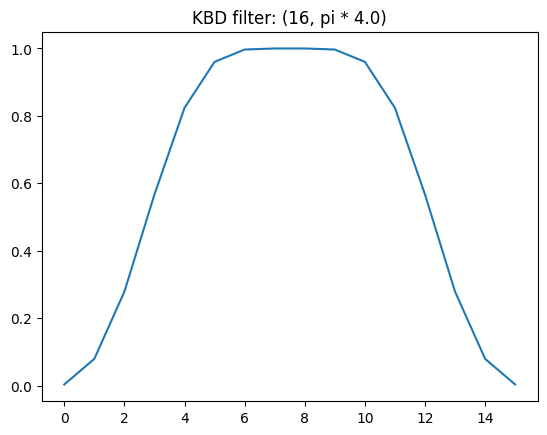

In [8]:
N=16

dct_type = 4
dct_norm = 'ortho'
kbd_alpha = 4.0

wfltr = kbd(N, np.pi * kbd_alpha) # upto 709

plt.figure()
plt.plot(wfltr)
plt.title(f"KBD filter: ({N}, pi * {kbd_alpha})")

plt.savefig(f'{output}/kbd.png')

In [9]:
x = np.zeros(64) - 128

y = mdct(x, N, wfltr, type=dct_type, norm=dct_norm, orthogonalize=True)

y.reshape((8, 8))[:, -7:] = 0

y = y.flatten()

z = imdct(y, N, wfltr, type=dct_type, norm=dct_norm, orthogonalize=True)

Text(0.5, 1.0, 'Reconstruction error: (16, 7, alpha=4.0')

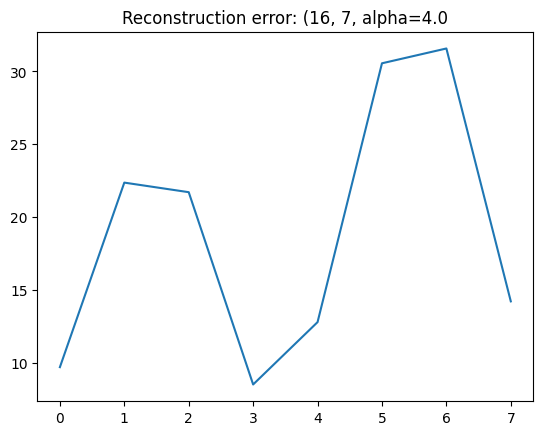

In [10]:


plt.figure()
plt.plot(abs(z.reshape((8, 8)) + 128)[0])
plt.title(f"Reconstruction error: ({N}, 7, alpha={kbd_alpha}")